### Import data

In [12]:
import pyreadr

data = pyreadr.read_r("./dat_cars.Rdata")
# To confirm reading - should print "['Ford', ... , 'Alfa Romeo']"" (20 values)
print(data["dat_cars"]["Brand"].values)


['Ford' 'Renault' 'Tesla' 'Volkswagen' 'BMW' 'Lexus' 'Nissan' 'Volvo'
 'Fiat' 'Peugeot' 'Mercedes' 'Toyota' 'Cupra' 'Kia' 'Opel' 'Polestar'
 'Skoda' 'Mazda' 'Audi' 'Alfa Romeo']


### Proper Graphics Representation for Price

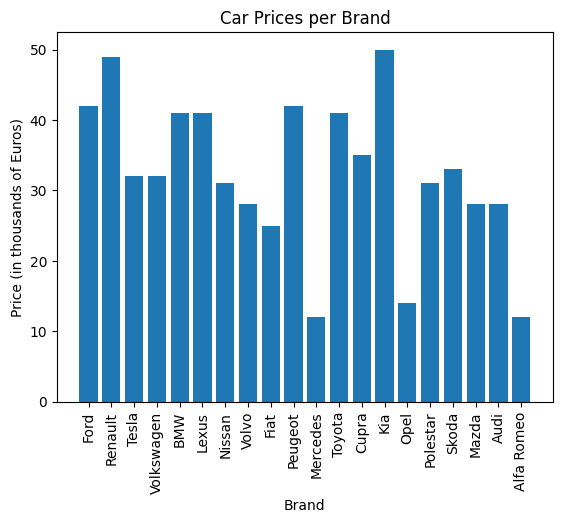

In [22]:
import matplotlib.pyplot as plt

prices_k_euros = [price/1_000 for price in data["dat_cars"]["Price"].values]
brands = data["dat_cars"]["Brand"].values

plt.title("Car Prices per Brand")
plt.xlabel("Brand")
plt.ylabel("Price (in thousands of Euros)")
plt.xticks(rotation=90)
plt.bar(brands, prices_k_euros)
plt.show()

### Covariance between Weight and Price 

Using *Covariance* definition from https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/covariance/

In [24]:
prices = data["dat_cars"]["Price"].values
weights = data["dat_cars"]["Weight"].values
mean_price = sum(prices)/len(prices)
mean_weight = sum(weights)/len(weights)
# Assuming the number of values is the same for prices and weights
cov_num = 0
for i in range(len(prices)):
    cov_num += (weights[i] - mean_weight)*(prices[i] - mean_price)
cov = cov_num / (len(prices) - 1)
print(f"Covariance between Weight and Price is {cov}")


Covariance between Weight and Price is -2098947.3684210526


### Correlation between Weight and Price

Assuming the desired *Correlation Coeficient* is the *Pearson's Correlation* defined in 
https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/#definition


In [27]:
import math
prices = data["dat_cars"]["Price"].values
weights = data["dat_cars"]["Weight"].values
sum_weights = sum(weights)
sum_prices = sum(prices)
sum_products = 0   # the sum of the weight x price products
sum_sq_weights = 0 # the sum of the squared weights
sum_sq_prices = 0  # the sum of the squared prices
for i in range(len(prices)):
    sum_products += weights[i] * prices[i]
    sum_sq_weights += weights[i] * weights[i]
    sum_sq_prices += prices[i] * prices[i]
corr_num = len(prices)*sum_products - sum_weights*sum_prices
corr_sq_den_weight = len(weights)*sum_sq_weights-math.pow(sum_weights, 2)
corr_sq_den_prices = len(prices)*sum_sq_prices-math.pow(sum_prices, 2)
corr_den = corr_sq_den_weight * corr_sq_den_prices
corr = corr_num / corr_den
print(f"Pearson's Correlation between Weight and Price is {corr}")

Pearson's Correlation between Weight and Price is -1.1965644270973141e-10


As the Correlation between Weight and Price is quite close to zero, the conclusion is that Weight and Price are not related.

### Scatterplot of Weight and Power

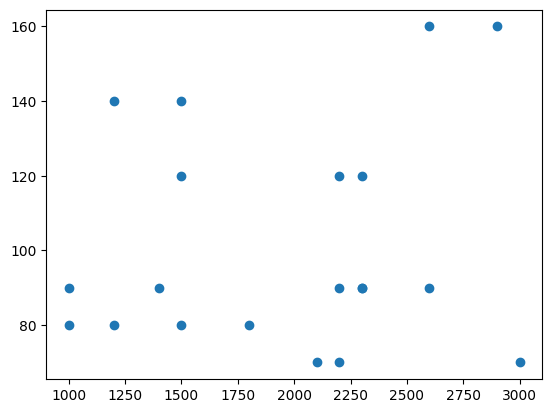

In [28]:
weights = data["dat_cars"]["Weight"].values
powers = data["dat_cars"]["Power"].values

plt.scatter(weights, powers)
plt.show()